# Salary Dataset

In [441]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [442]:
ds= pd.read_csv('salary.csv')
ds

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [443]:
df_salary=pd.DataFrame(data=ds)
df_salary

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [444]:
df_salary.shape

(10, 5)

In [445]:
df_salary.columns

Index(['index', 'Nation', 'purchased_item', 'salary', 'age'], dtype='object')

In [446]:
df_salary.describe()

,index,salary,age
count,10.00000,8.000000,8.000000
mean,4.50000,60873.000000,34.750000
std,3.02765,20910.535349,16.104569
min,0.00000,34559.000000,21.000000
25%,2.25000,43750.000000,23.750000
50%,4.50000,61166.000000,25.000000
75%,6.75000,72386.000000,47.000000
max,9.00000,89993.000000,62.000000


In [447]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10 non-null     int64  
 1   Nation          10 non-null     object 
 2   purchased_item  10 non-null     object 
 3   salary          8 non-null      float64
 4   age             8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 528.0+ bytes


In [448]:
df_salary.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            2
age               2
dtype: int64

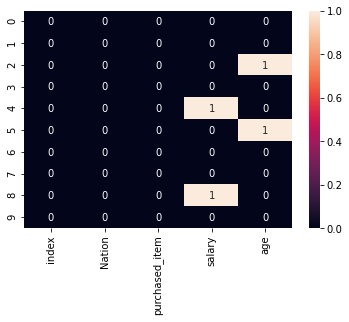

In [449]:
sns.heatmap(df_salary.isnull(),annot=True)
plt.show()

In [450]:
#removing null values using imputer
from sklearn.impute import SimpleImputer

# create instance of imputer class
imp = SimpleImputer(strategy='mean')
columns=['salary','age']
for val in columns:
    df_salary[val]=imp.fit_transform(df_salary[val].values.reshape(-1,1))
df_salary

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.00
1,1,Russia,Yes,87878.0,24.00
2,2,Germany,No,34559.0,34.75
3,3,India,Yes,40000.0,26.00
4,4,Germany,Yes,60873.0,21.00
5,5,Russia,No,45000.0,34.75
6,6,Germany,Yes,89993.0,62.00
7,7,India,No,55555.0,24.00
8,8,Russia,Yes,60873.0,45.00
9,9,Germany,Yes,67222.0,53.00


In [451]:
#use LabelEncoding Tachnic 
from sklearn.preprocessing import LabelEncoder
le_salary= LabelEncoder()
columns=['Nation','purchased_item']
for val in columns:
    df_salary[val]=le_salary.fit_transform(df_salary[val].astype(str))
df_salary

,index,Nation,purchased_item,salary,age
0,0,1,0,66777.0,23.00
1,1,2,1,87878.0,24.00
2,2,0,0,34559.0,34.75
3,3,1,1,40000.0,26.00
4,4,0,1,60873.0,21.00
5,5,2,0,45000.0,34.75
6,6,0,1,89993.0,62.00
7,7,1,0,55555.0,24.00
8,8,2,1,60873.0,45.00
9,9,0,1,67222.0,53.00


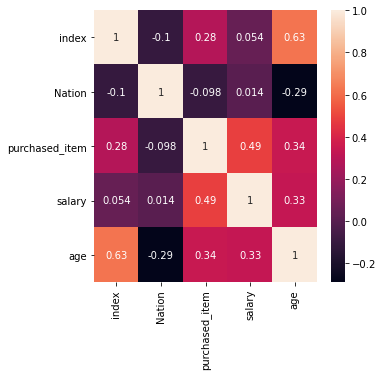

In [452]:
#Co-relation graph
plt.figure(figsize=(5,5))
sns.heatmap(df_salary.corr(),annot=True)
plt.show()

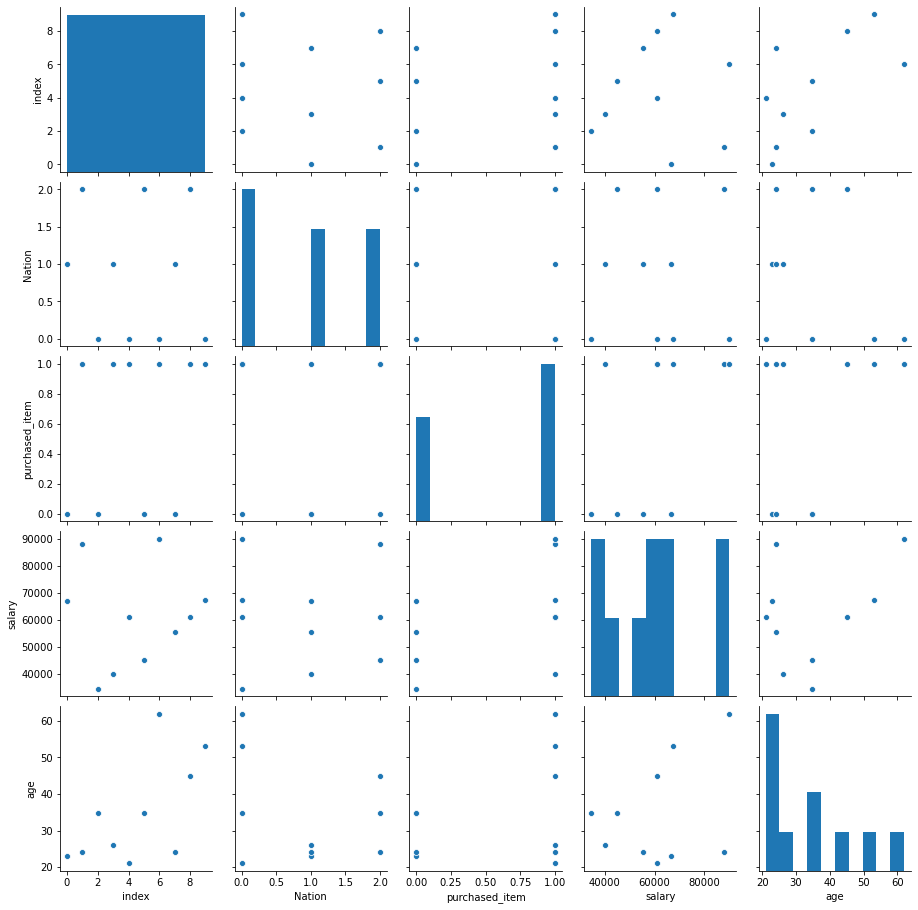

In [453]:
sns.pairplot(df_salary)

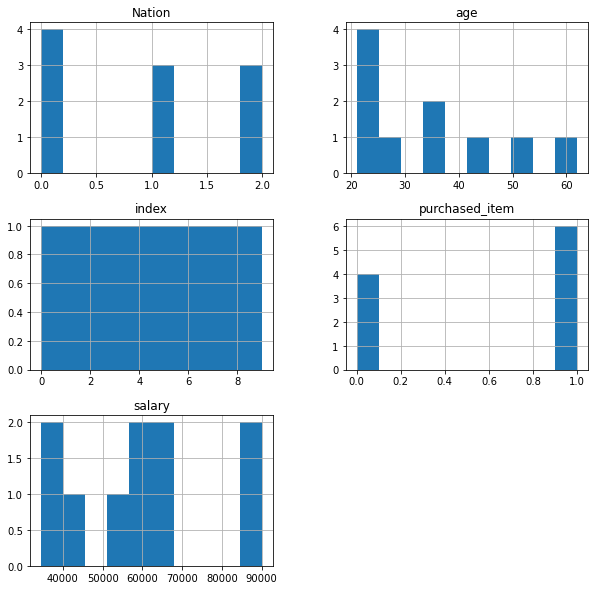

In [454]:
df_salary.hist(figsize=(10,10))
plt.show()

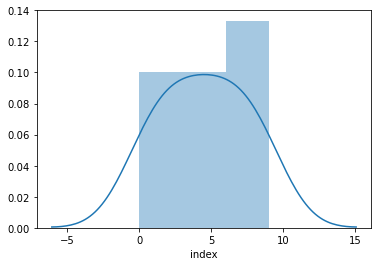

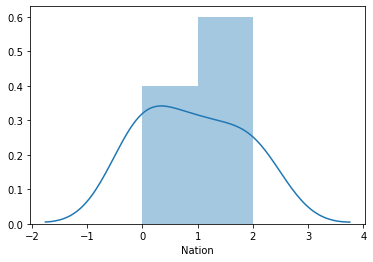

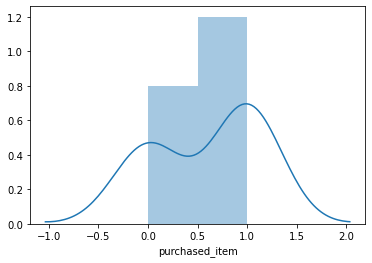

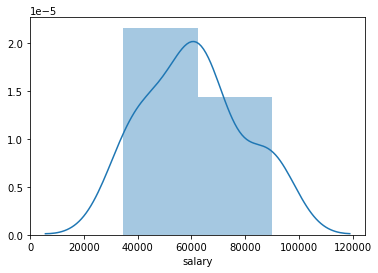

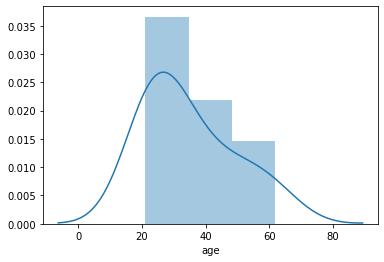

In [455]:
for i in df_salary.columns:
    plt.figure()
    sns.distplot(df_salary[i])

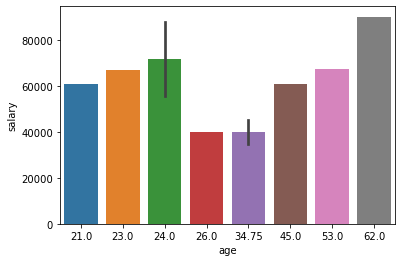

In [456]:
sns.barplot(x='age',y='salary',data=df_salary)

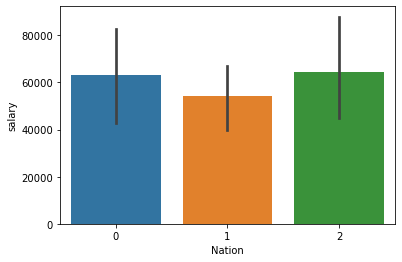

In [457]:
sns.barplot(x='Nation',y='salary',data=df_salary)

In [458]:
df_salary.skew()

index             0.000000
Nation            0.223451
purchased_item   -0.484123
salary            0.296409
age               0.970209
dtype: float64

In [459]:
#skewness treating using log
for columns in df_salary.columns:
    if df_salary.skew().loc[columns]>0.55:
        df_salary[columns]=np.log1p(df_salary[columns])

In [460]:
df_salary.skew()

index             0.000000
Nation            0.223451
purchased_item   -0.484123
salary            0.296409
age               0.599433
dtype: float64

index                AxesSubplot(0.125,0.125;0.133621x0.755)
Nation            AxesSubplot(0.285345,0.125;0.133621x0.755)
purchased_item     AxesSubplot(0.44569,0.125;0.133621x0.755)
salary            AxesSubplot(0.606034,0.125;0.133621x0.755)
age               AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

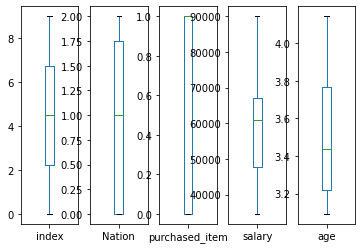

In [461]:
df_salary.plot(kind='box',subplots=True)

In [462]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [463]:
x=df_salary.iloc[:,1:-1]
x

,Nation,purchased_item,salary
0,1,0,66777.0
1,2,1,87878.0
2,0,0,34559.0
3,1,1,40000.0
4,0,1,60873.0
5,2,0,45000.0
6,0,1,89993.0
7,1,0,55555.0
8,2,1,60873.0
9,0,1,67222.0


In [464]:
y=df_salary.iloc[:,-1]
y

0    3.178054
1    3.218876
2    3.576550
3    3.295837
4    3.091042
5    3.576550
6    4.143135
7    3.218876
8    3.828641
9    3.988984
Name: age, dtype: float64

In [465]:
x.shape

(10, 3)

In [466]:
y.shape

(10,)

In [467]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=20)

In [468]:
x_train.shape

(7, 3)

In [469]:
y_train.shape

(7,)

In [470]:
x_test.shape

(3, 3)

In [471]:
y_test.shape

(3,)

In [472]:
lm = LinearRegression()

In [473]:
lm.fit(x_train,y_train)

LinearRegression()

In [474]:
lm.coef_

array([-7.63197476e-02, -9.88452677e-03,  8.80856127e-06])

In [475]:
lm.intercept_

3.0903679962900457

In [476]:
lm.score(x_train,y_train)

0.24471243774498608

In [477]:
pred=lm.predict(x_test)
print("Predicted result price",pred)
print("actual price",y_test)

Predicted result price [3.50340787 3.70192272 3.46404752]
actual price 7    3.218876
1    3.218876
8    3.828641
Name: age, dtype: float64


In [478]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.37739093805913315
Mean squared error: 0.14907382697288438
Root Mean Squared Error: 0.38610079897985755


In [479]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-0.8042142763746063
